In [1]:
pip install elapid

In [2]:
pip install geopandas

In [3]:
pip install rasterio

In [4]:
# Import the Necessary Library Packages

import elapid as ela # Species Distribution Modeling Tools
import os # To Load the Datasets/Files from the Specified Directory
import warnings # To Ignore all the Warning Messages
import numpy as np # To Load the Numerical Python Values (Arrays)
import pandas as pd # To Load the Dataframe of the given Dataset/File
import geopandas as gpd #for Geospatial Data, specifically Vector Data and other formats such as shapefiles, GeoJSON & Geopackage files
import rasterio as rio # Reading, Writing, and Manipulating Raster Geospatial Data
import rasterio.plot as rioplot # To Visualize Raster Data
from sklearn import metrics # For Evaluation Metrics (To assess the performance)
import matplotlib as mpl # For Data Visualization
import matplotlib.pyplot as plt # For Data Visualization
from rasterio.plot import show # To Display the raster data using the show function
import ipywidgets as widgets # To use HTML Interactive Widgets
from IPython.display import display # To Control the output display of objects
import re # For Patterns, i.e., used to match and manipulate strings

# PLot Preferences
mpl.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/'

In [7]:
# Creates a list of bioclimate variables by iterating through files in the "bio_clim" directory and selecting only those files with the ".tif" extension
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]


In [8]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_1_Annual_mean_Temperature_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_2_Mean_Diurnal_Range_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_3_Isothermality_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_4_Temperature_Seasonality_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_5__Maximum_Temperature_of_Warmest_Mont_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_6_Minimum_Temperature_of_Coldest_Month_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_7_Temperature_Annual_Range_WC_1970_2000.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Island_From_WC/Bio_8_Mean_Temperature_of_Wettest_Quarter_WC_1970_2000.tif


In [9]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['Bio_1_Annual_mean_Temperature_WC_1970_2000', 'Bio_2_Mean_Diurnal_Range_WC_1970_2000', 'Bio_3_Isothermality_WC_1970_2000', 'Bio_4_Temperature_Seasonality_WC_1970_2000', 'Bio_5__Maximum_Temperature_of_Warmest_Mont_WC_1970_2000', 'Bio_6_Minimum_Temperature_of_Coldest_Month_WC_1970_2000', 'Bio_7_Temperature_Annual_Range_WC_1970_2000', 'Bio_8_Mean_Temperature_of_Wettest_Quarter_WC_1970_2000', 'Bio_9_Mean_Temperature_of_Driest_Quarter_WC_1970_2000', 'Bio_10_Mean_Temperature_of_Warmest_Quarter_WC_1970_2000', 'Bio_11_Mean_Temperature_of_Coldest_Quarter_WC_1970_2000', 'Bio_12_Annual_Precipitation_WC_1970_2000', 'Bio_13_Precipitation_of_Wettest_Month_WC_1970_2000', 'Bio_14_Precipitation_of_Driest_Month_WC_1970_2000', 'Bio_15_Precipitation_of_Seasonality_WC_1970_2000', 'Bio_16_Precipitation_of_Wettest_Quarter_WC_1970_2000', 'Bio_17_Precipitation_of_Driest_Quarter_WC_1970_2000', 'Bio_18_Precipitation_of_Warmest_Quarter_WC_1970_2000', 'Bio_19_Precipitation_of_Coldest_Quarter_WC_1970_2000']


In [10]:
vector='/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg'

In [11]:
# read the presence data, draw background point samples
presence = gpd.read_file(vector)

In [12]:
presence.head()

,scientific,locality,occurrence,latitude,longitude,day,month,Year,geometry
0,"Diaprepes abbreviatus (Linnaeus""",US,Florida,26.082689,-80.237779,2023-06-13T14:26:00,13,2023,POINT (-80.23778 26.08269)
1,"Diaprepes abbreviatus (Linnaeus""",US,Florida,28.813627,-81.324068,2017-07-16T21:08:14,16,2017,POINT (-81.32407 28.81363)
2,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.755168,-95.417309,2023-06-13T14:25:09,13,2023,POINT (-95.41731 29.75517)
3,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.958864,-95.562072,2023-06-12T16:13:37,12,2023,POINT (-95.56207 29.95886)
4,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.584945,-95.031163,2023-06-11T14:35:33,11,2023,POINT (-95.03116 29.58495)


In [13]:
# Clears the output in IPython display
from IPython.display import clear_output


# Define the "plot_surface" Function to display the selected BioClim Variable
def plot_surface(bio_clim):
    #
    fig, ax = plt.subplots(figsize=(6, 6))

    with rio.open(bio_clim, 'r') as src:
        profile = src.profile.copy()

        # Low temperatures are dark grey, high temperatures are light grey
        rioplot.show(src, ax=ax, cmap="turbo")

        # Overlay the stingbug data
        presence.to_crs(src.crs).plot(column='scientific', ax=ax, legend=True,cmap='pink')

    plt.show()

# Define the "on_file_selection" Function to select the BioClim Variable
def on_file_selection(change):
    if change.new: # checks if a new file has been selected
        bio_clim = change.new
        with output_area:  # It allows controlling where the output is displayed
            clear_output(wait=True)
            # Extract the module name from the file path
            module_name = os.path.basename(bio_clim)
            print(f"Title: {module_name}")  # Print the selected module name
            plot_surface(bio_clim) # Call the plot_surface function

# Create the dropdown widget with raster names
file_widget = widgets.Dropdown(options=bioclimate_variables, description='Select a file')

# Display the file selection widget and output area
output_area = widgets.Output()

# Display the file selection widget and output area
output_area = widgets.Output()

# Call the plot_surface function when file(s) are selected
file_widget.observe(on_file_selection, names='value')

display(file_widget, output_area)

Dropdown(description='Select a file', options=('/content/drive/MyDrive/Project_2/Insect Pest/tif files/Crop_Is…

Output()

# Bio_1_Annual_mean_Temperature_WC

In [14]:
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-86.27100 23.80973)
1    POINT (-84.60433 34.30973)
2    POINT (-94.10433 23.30973)
3    POINT (-66.93767 18.64307)
4    POINT (-90.43767 29.47640)
dtype: geometry

In [15]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [16]:
merged[merged['class']==1]

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1
...,...,...
1226,POINT (-90.12826 29.94177),1
1227,POINT (-80.14692 25.75184),1
1228,POINT (-80.14730 25.75390),1
1229,POINT (-80.14732 25.75394),1


In [17]:
merged[merged['class']==0]

,geometry,class
1231,POINT (-86.27100 23.80973),0
1232,POINT (-84.60433 34.30973),0
1233,POINT (-94.10433 23.30973),0
1234,POINT (-66.93767 18.64307),0
1235,POINT (-90.43767 29.47640),0
...,...,...
11226,POINT (-66.93767 18.80973),0
11227,POINT (-83.43767 26.47640),0
11228,POINT (-83.43767 28.64307),0
11229,POINT (-89.93767 17.97640),0


In [18]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-80.23778 26.08269),1,24.258209,8.901375,49.717934,333.594208,32.491249,14.587500,17.903749,27.906042,...,28.036833,19.956541,1562.0,240.0,59.0,46.922352,588.0,196.0,554.0,196.0
1,POINT (-81.32407 28.81363),1,21.826792,11.665542,48.080544,473.599609,33.030998,8.768500,24.262497,27.208584,...,27.216915,15.706250,1240.0,178.0,47.0,49.644379,522.0,159.0,515.0,188.0
2,POINT (-80.29333 26.26842),1,24.041365,9.201479,49.654526,344.938293,32.721249,14.190250,18.530998,27.835417,...,27.964375,19.614334,1544.0,229.0,57.0,45.736950,574.0,196.0,551.0,196.0
3,POINT (-67.00231 18.48922),1,24.341324,12.498523,77.681641,128.833481,32.004761,15.915344,16.089417,25.591181,...,25.731834,22.686111,1898.0,237.0,76.0,34.793346,638.0,261.0,566.0,261.0
4,POINT (-65.86452 18.28092),1,24.548136,8.809063,71.506485,137.269745,30.347750,18.028500,12.319250,25.850458,...,26.033209,22.784750,2041.0,238.0,81.0,32.127739,689.0,286.0,634.0,286.0


In [19]:
# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [20]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [21]:
# evaluate training performance
ypred = model.predict(x)
auc1 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc1:0.3f}")



Training AUC score: 0.964


In [22]:
# write the model predictions to disk
output_raster = 'Annual_mean_Temperature_WC_Prediction1.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

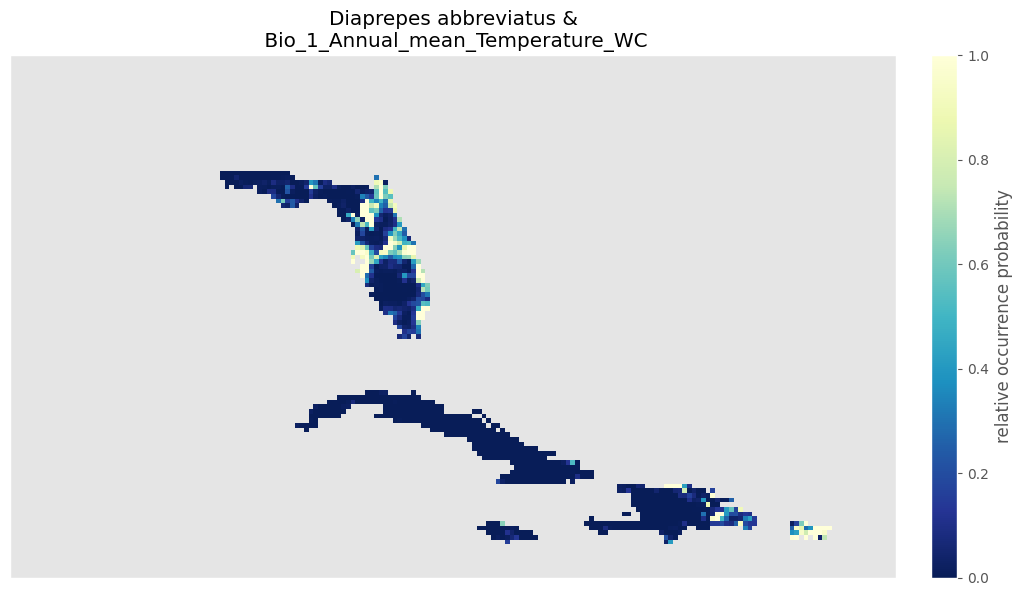

In [23]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus &\n Bio_1_Annual_mean_Temperature_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_2_Mean_Diurnal_Range_WC.tif

In [24]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0    POINT (-88.43767 20.14307)
1    POINT (-74.77100 25.14307)
2    POINT (-89.60433 19.64307)
3    POINT (-69.77100 21.30973)
4    POINT (-74.10433 33.80973)
dtype: geometry

In [25]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [26]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']



In [27]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [28]:
# evaluate training performance
ypred = model.predict(x)
auc2 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc2:0.3f}")

Training AUC score: 0.961


In [29]:
# write the model predictions to disk
output_raster = 'Mean_Diurnal_Range_WC_Prediction2.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [30]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


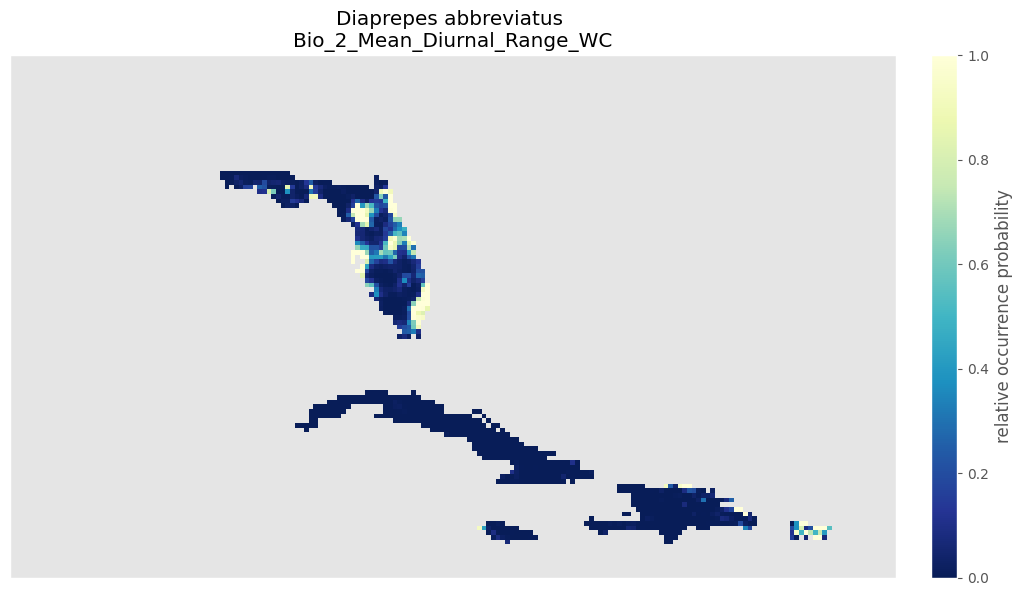

In [31]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_2_Mean_Diurnal_Range_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_3_Isothermality_WC.tif

In [32]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-71.60433 31.97640)
1    POINT (-92.93767 29.47640)
2    POINT (-82.43767 28.97640)
3    POINT (-89.77100 24.97640)
4    POINT (-77.93767 23.30973)
dtype: geometry

In [33]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [34]:

annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']


In [35]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [36]:
# evaluate training performance
ypred = model.predict(x)
auc3 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc3:0.3f}")

Training AUC score: 0.967


In [37]:
# write the model predictions to disk
output_raster = 'Isothermality_WC_Prediction3.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [38]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

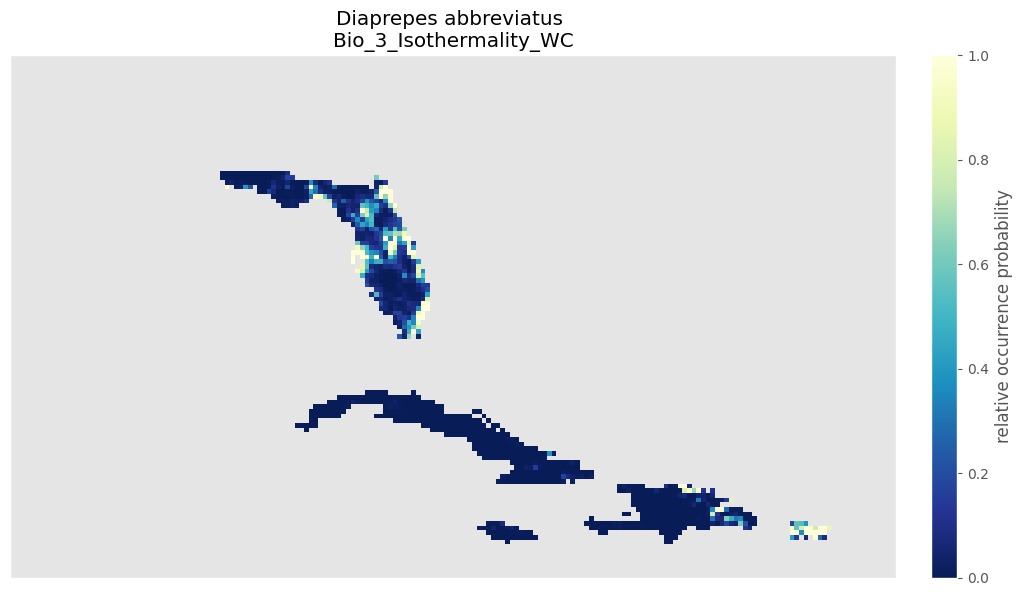

In [39]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_3_Isothermality_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_4_Temperature_Seasonality_WC.tif

In [40]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-68.10433 32.80973)
1    POINT (-75.77100 30.97640)
2    POINT (-75.77100 34.64307)
3    POINT (-64.93767 16.97640)
4    POINT (-84.60433 17.30973)
dtype: geometry

In [41]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [42]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [43]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [44]:
# evaluate training performance
ypred = model.predict(x)
auc4 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc4:0.3f}")

Training AUC score: 0.957


In [45]:
# write the model predictions to disk
output_raster = 'Temperature_Seasonality_WC4.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [46]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


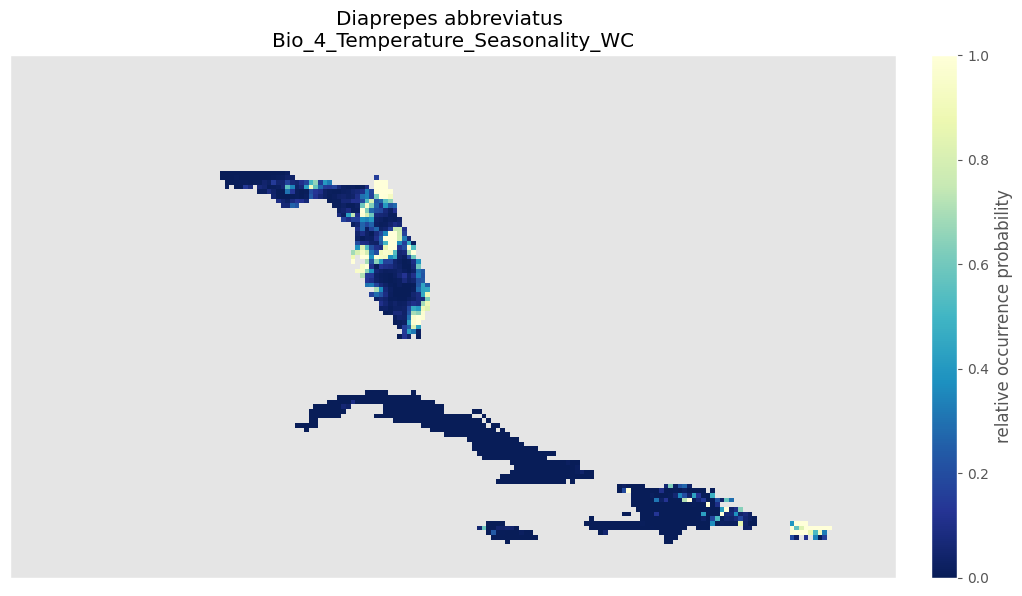

In [47]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_4_Temperature_Seasonality_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_5_Maximum_Temperature_of_Warmest_Month_WC.tif

In [48]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-85.10433 16.97640)
1    POINT (-64.60433 25.14307)
2    POINT (-93.77100 16.80973)
3    POINT (-66.27100 28.64307)
4    POINT (-69.93767 29.47640)
dtype: geometry

In [49]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [50]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [51]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [52]:
# evaluate training performance
ypred = model.predict(x)
auc5 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc5:0.3f}")

Training AUC score: 0.969


In [53]:
# write the model predictions to disk
output_raster = 'Maximum_Temperature_of_Warmest_Month_WC_Prediction5.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [54]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

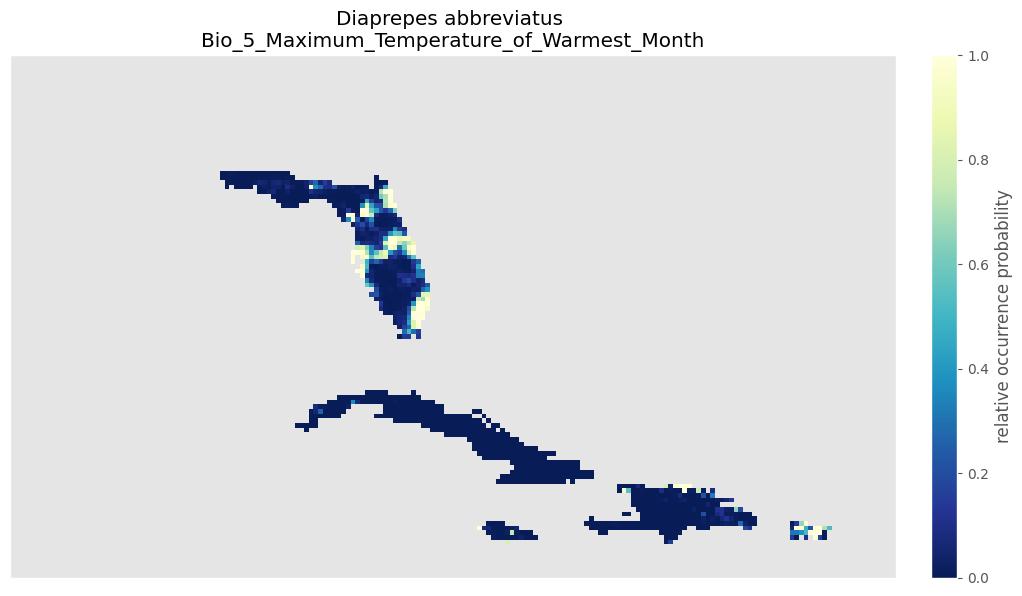

In [55]:
   # plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_5_Maximum_Temperature_of_Warmest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_6_Minimum_Temperature_of_Coldest_Month_WC.tif


In [56]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-81.93767 34.64307)
1    POINT (-78.43767 29.80973)
2    POINT (-72.60433 29.14307)
3    POINT (-83.43767 19.80973)
4    POINT (-69.27100 26.97640)
dtype: geometry

In [57]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [58]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [59]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [60]:
# evaluate training performance
ypred = model.predict(x)
auc6 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc6:0.3f}")

Training AUC score: 0.965


In [61]:
# write the model predictions to disk
output_raster = 'Minimum_Temperature_of_Coldest_Month_WC_Prediction6.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [62]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


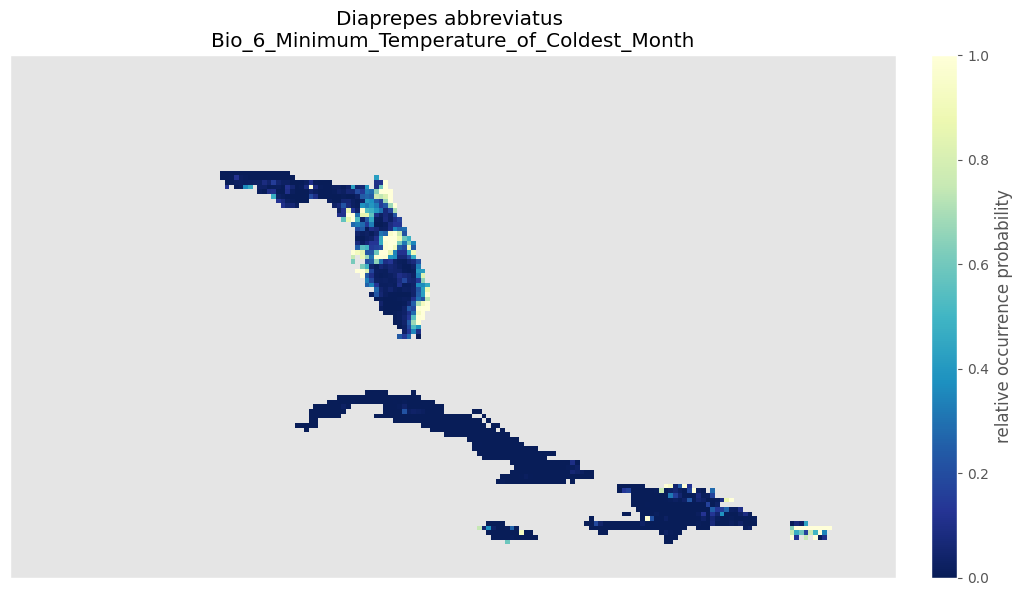

In [63]:
 # plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_6_Minimum_Temperature_of_Coldest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_7_Temperature_Annual_Range_WC.tif

In [64]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0    POINT (-69.77100 29.80973)
1    POINT (-74.93767 34.97640)
2    POINT (-72.43767 33.47640)
3    POINT (-68.77100 18.47640)
4    POINT (-89.60433 20.97640)
dtype: geometry

In [65]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [66]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [67]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [68]:
# evaluate training performance
ypred = model.predict(x)
auc7 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc7:0.3f}")

Training AUC score: 0.964


In [69]:
# write the model predictions to disk
output_raster = 'Temperature_Annual_Range_WC_Prediction7.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [70]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


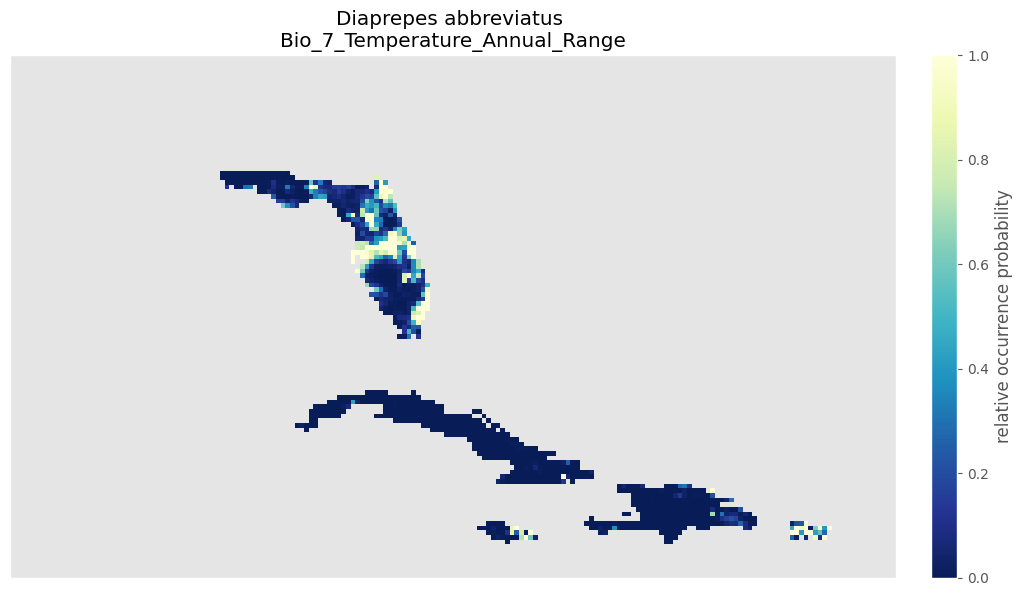

In [71]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_7_Temperature_Annual_Range')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_8_Mean_Temperature_of_Wettest_Quarter_WC.tif

In [72]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-81.43767 31.47640)
1    POINT (-72.77100 20.30973)
2    POINT (-88.77100 23.30973)
3    POINT (-77.77100 33.97640)
4    POINT (-67.93767 16.64307)
dtype: geometry

In [73]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [74]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [75]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [76]:
# evaluate training performance
ypred = model.predict(x)
auc8 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc8:0.3f}")

Training AUC score: 0.965


In [77]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Wettest_Quarter_WC_Prediction8.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

In [78]:
# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


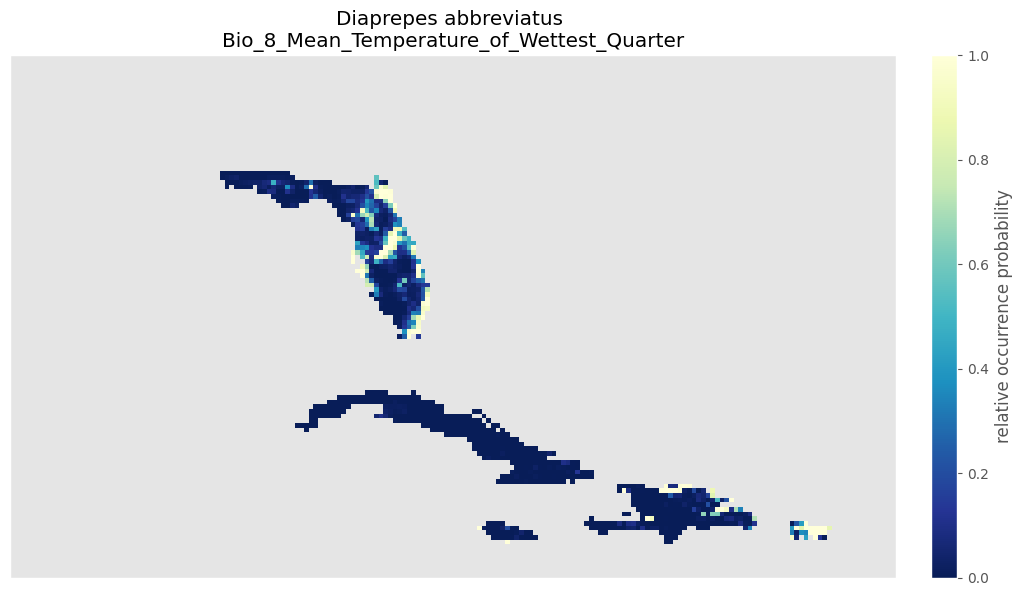

In [79]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_8_Mean_Temperature_of_Wettest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_9_Mean_Temperature_of_Driest_Quarter_WC.tif

In [80]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0    POINT (-93.77100 29.64307)
1    POINT (-74.43767 27.14307)
2    POINT (-63.43767 21.47640)
3    POINT (-89.77100 19.80973)
4    POINT (-64.93767 18.47640)
dtype: geometry

In [81]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [82]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [83]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [84]:
# evaluate training performance
ypred = model.predict(x)
auc9 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc9:0.3f}")

Training AUC score: 0.961


In [85]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Driest_Quarter_WC_Prediction9.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


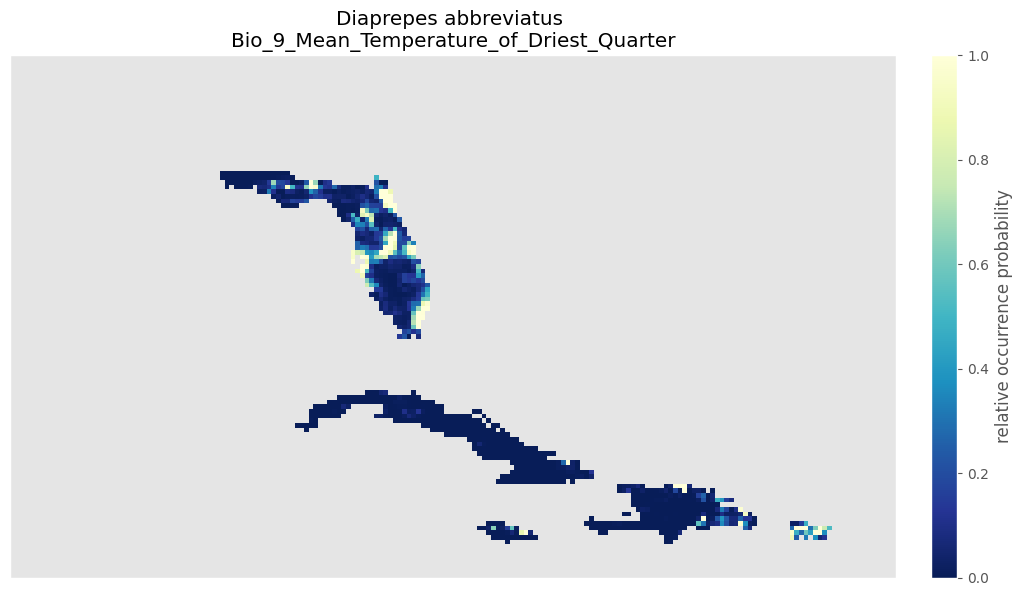

In [86]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_9_Mean_Temperature_of_Driest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_10_Mean_Temperature_of_Warmest_Quarter_WC.tif

In [87]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0    POINT (-75.77100 28.14307)
1    POINT (-65.10433 18.97640)
2    POINT (-86.27100 34.30973)
3    POINT (-75.77100 33.64307)
4    POINT (-72.77100 29.14307)
dtype: geometry

In [88]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [89]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [90]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [91]:
# evaluate training performance
ypred = model.predict(x)
auc10 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc10:0.3f}")

Training AUC score: 0.969


In [92]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Warmest_Quarter_WC_Prediction10.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


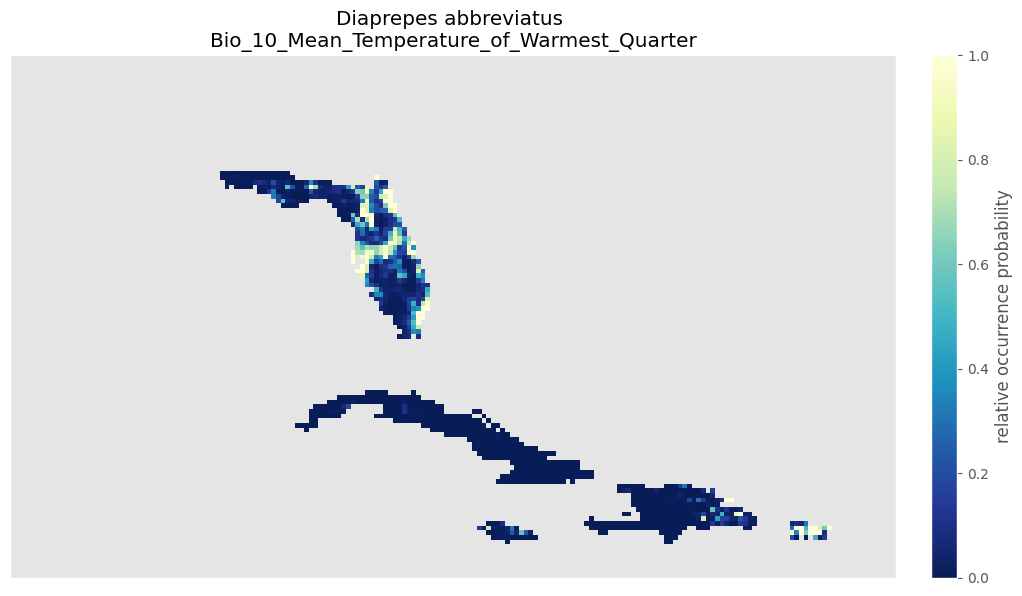

In [93]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_10_Mean_Temperature_of_Warmest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_11_Mean_Temperature_of_Coldest_Quarter_WC.tif

In [94]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-70.60433 23.30973)
1    POINT (-80.43767 22.80973)
2    POINT (-68.27100 23.47640)
3    POINT (-68.77100 28.14307)
4    POINT (-89.93767 18.30973)
dtype: geometry

In [95]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [96]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [97]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [98]:
# evaluate training performance
ypred = model.predict(x)
auc11 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc11:0.3f}")

Training AUC score: 0.964


In [99]:
# write the model predictions to disk
output_raster = 'Mean_Temperature_of_Coldest_Quarter_WC_Prediction11.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)

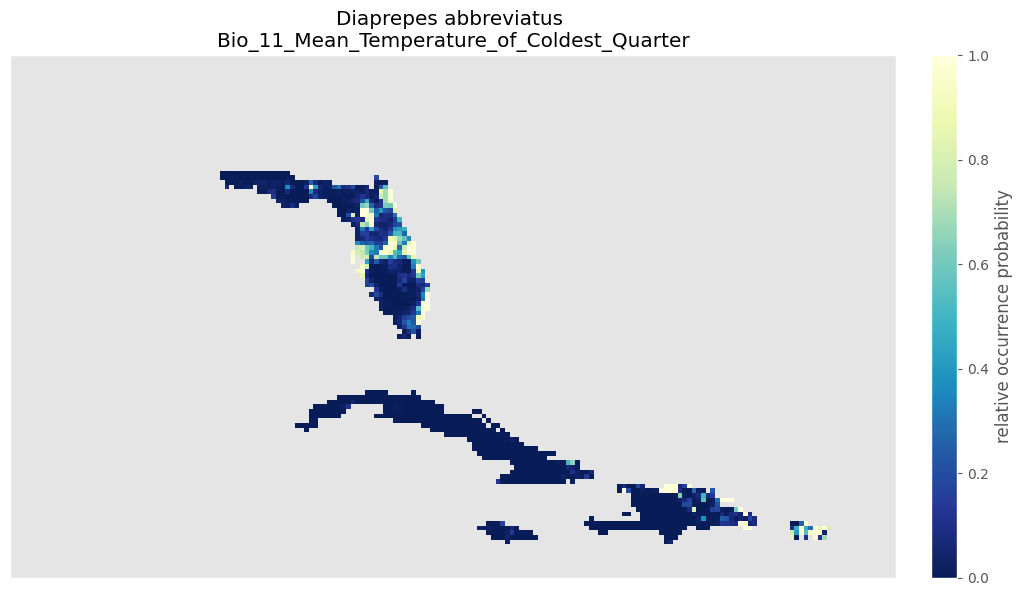

In [100]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_11_Mean_Temperature_of_Coldest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_12_Annual_Precipitation_WC.tif

In [101]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0    POINT (-68.27100 34.80973)
1    POINT (-85.10433 24.30973)
2    POINT (-70.27100 26.97640)
3    POINT (-84.93767 18.97640)
4    POINT (-82.27100 33.47640)
dtype: geometry

In [102]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [103]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [104]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [105]:
# evaluate training performance
ypred = model.predict(x)
auc12 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc12:0.3f}")

Training AUC score: 0.959


In [106]:
# save the fitted model to disk
ela.save_object(model, 'demo-maxent-model10.ela')

# write the model predictions to disk
output_raster = 'Annual_Precipitation_WC_Prediction12.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


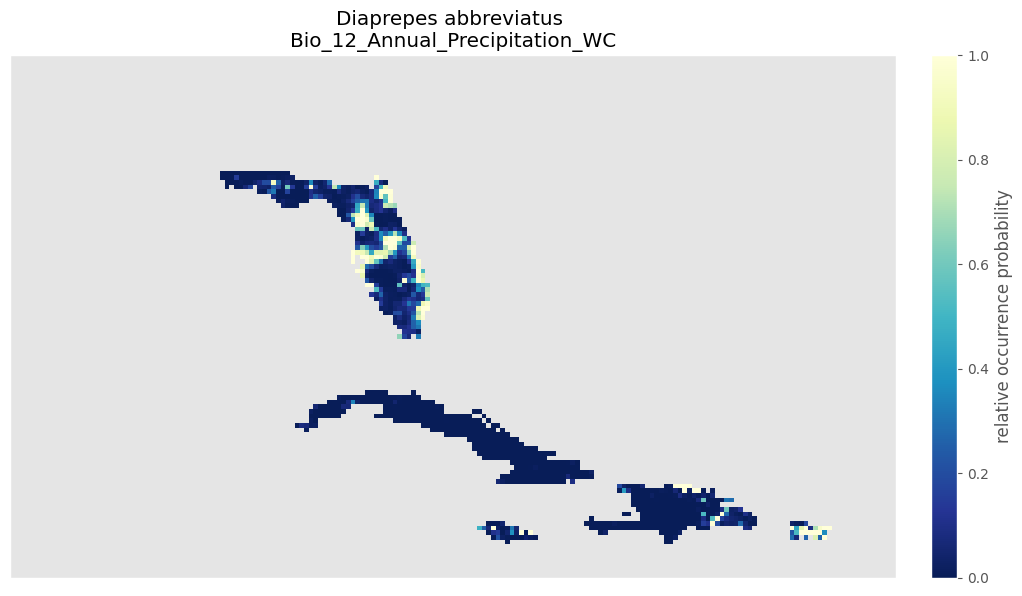

In [107]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_12_Annual_Precipitation_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_13_Precipitation_of_Wettest_Month_WC.tif

In [108]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-66.27100 20.97640)
1    POINT (-73.43767 30.30973)
2    POINT (-72.43767 33.30973)
3    POINT (-93.43767 32.97640)
4    POINT (-82.27100 34.64307)
dtype: geometry

In [109]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [110]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [111]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [112]:
# evaluate training performance
ypred = model.predict(x)
auc13 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc13:0.3f}")

Training AUC score: 0.961


In [113]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Wettest_Month_WC_Prediction13.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


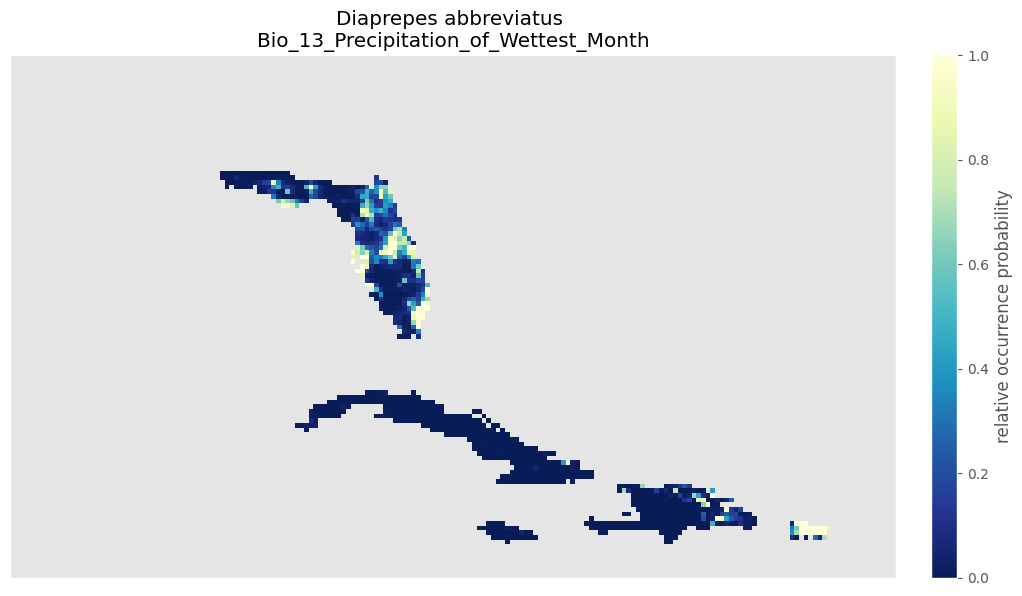

In [114]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_13_Precipitation_of_Wettest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_14_Precipitation_of_Driest_Month_WC.tif

In [115]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-71.93767 32.14307)
1    POINT (-70.43767 34.97640)
2    POINT (-86.60433 21.14307)
3    POINT (-83.60433 24.30973)
4    POINT (-87.27100 22.14307)
dtype: geometry

In [116]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [117]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [118]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [119]:
# evaluate training performance
ypred = model.predict(x)
auc14 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc14:0.3f}")

Training AUC score: 0.976


In [120]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Driest_Month_WC_Prediction14.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


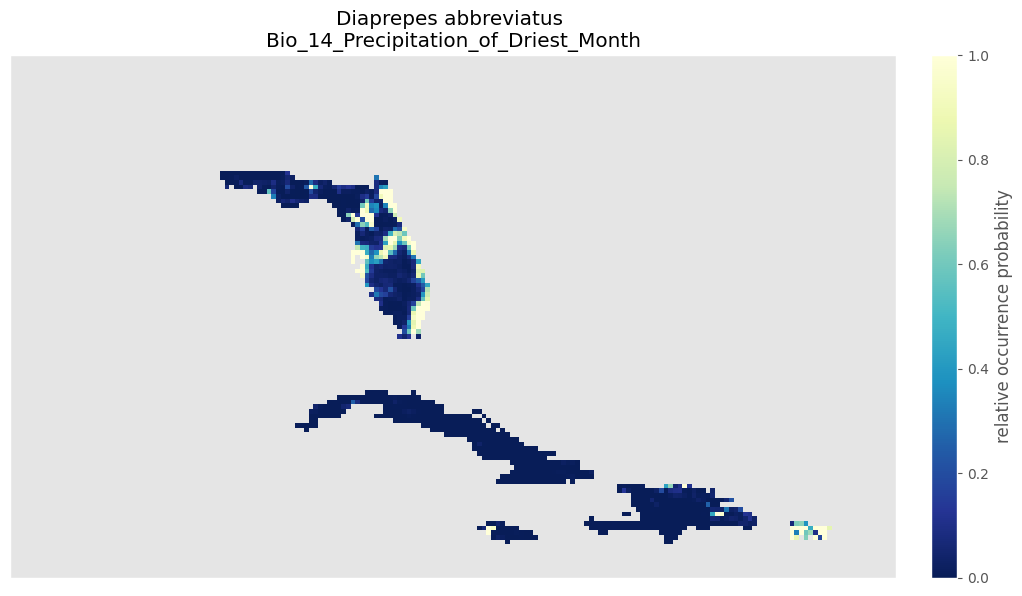

In [121]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_14_Precipitation_of_Driest_Month')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_15_Precipitation_of_Seasonality_WC.tif

In [122]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-65.43767 31.80973)
1    POINT (-81.27100 28.64307)
2    POINT (-89.43767 29.30973)
3    POINT (-73.93767 29.14307)
4    POINT (-93.77100 29.97640)
dtype: geometry

In [123]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [124]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [125]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [126]:
# evaluate training performance
ypred = model.predict(x)
auc15 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc15:0.3f}")

Training AUC score: 0.967


In [127]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Seasonality_WC_Prediction15.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


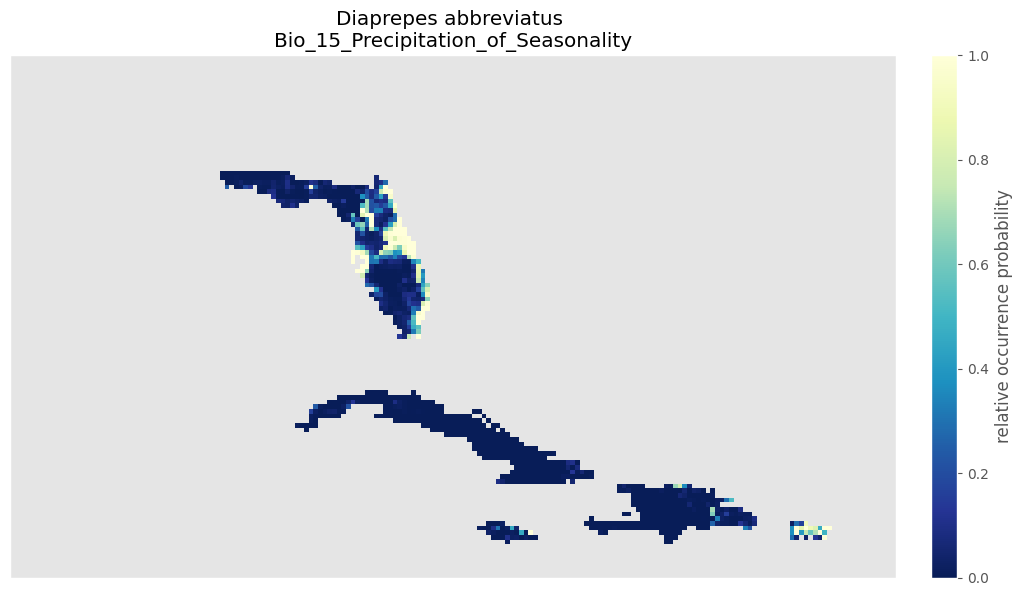

In [128]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_15_Precipitation_of_Seasonality')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_16_Precipitation_of_Wettest_Quarter_WC.tif

In [129]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0    POINT (-93.27100 23.97640)
1    POINT (-76.60433 27.30973)
2    POINT (-66.10433 22.47640)
3    POINT (-82.77100 18.47640)
4    POINT (-70.43767 34.47640)
dtype: geometry

In [130]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [131]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [132]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [133]:
# evaluate training performance
ypred = model.predict(x)
auc16 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc16:0.3f}")

Training AUC score: 0.966


In [134]:


# write the model predictions to disk
output_raster = 'Precipitation_of_Wettest_Quarter_WC_Prediction16.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


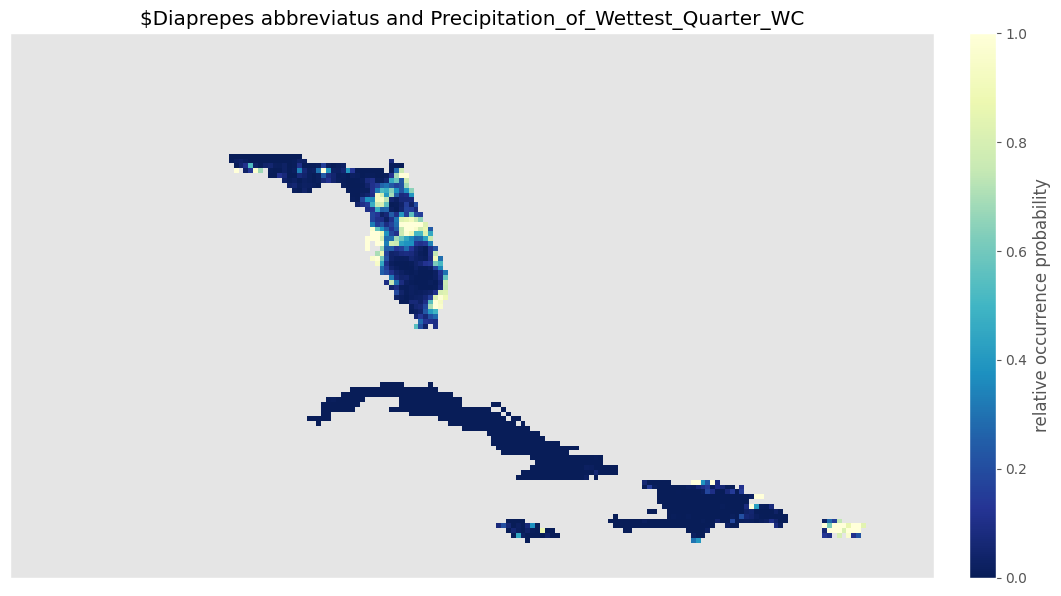

In [135]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Diaprepes abbreviatus and Precipitation_of_Wettest_Quarter_WC')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_17_Precipitation_of_Driest_Quarter_WC.tif

In [136]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-94.77100 22.30973)
1    POINT (-70.93767 29.80973)
2    POINT (-86.77100 27.47640)
3    POINT (-87.10433 24.14307)
4    POINT (-91.10433 33.97640)
dtype: geometry

In [137]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [138]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [139]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [140]:
# evaluate training performance
ypred = model.predict(x)
auc17 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc17:0.3f}")

Training AUC score: 0.963


In [141]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Driest_Quarter_WC_Prediction17.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


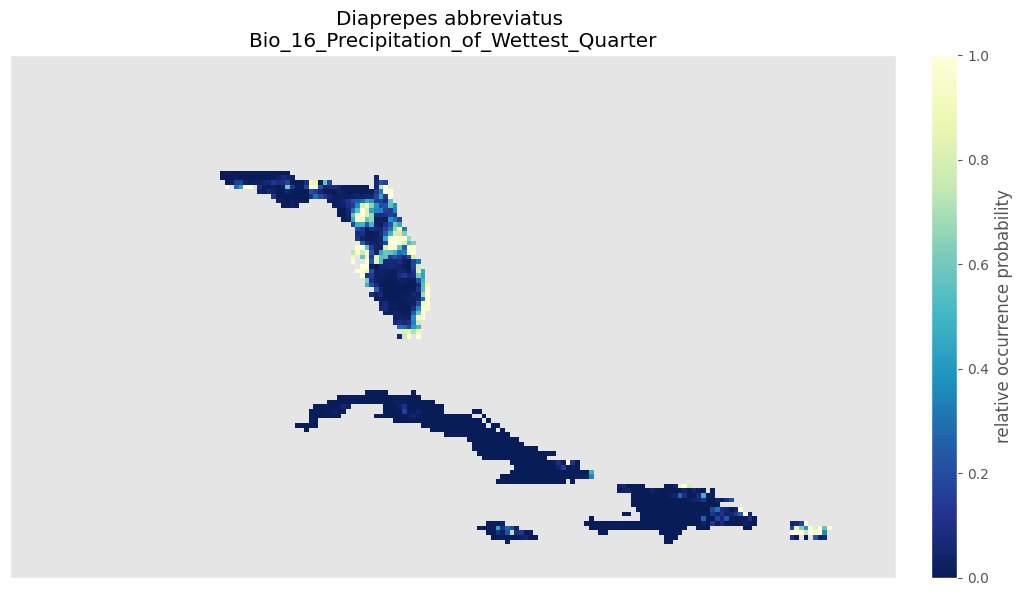

In [142]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_16_Precipitation_of_Wettest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_18_Precipitation_of_Warmest_Quarter_WC.tif

In [143]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-88.10433 17.30973)
1    POINT (-73.27100 30.30973)
2    POINT (-66.77100 29.30973)
3    POINT (-72.43767 17.80973)
4    POINT (-87.10433 22.80973)
dtype: geometry

In [144]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [145]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [146]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [147]:
# evaluate training performance
ypred = model.predict(x)
auc18 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc18:0.3f}")

Training AUC score: 0.957


In [148]:

# write the model predictions to disk
output_raster = 'Precipitation_of_Warmest_Quarter_WC_Prediction18.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


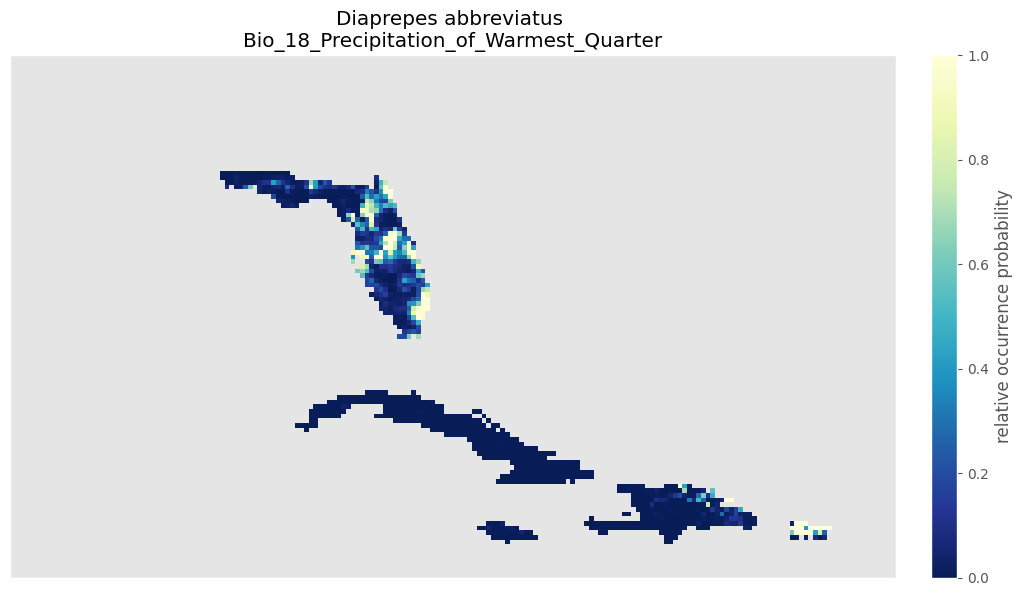

In [149]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_18_Precipitation_of_Warmest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

# Bio_19_Precipitation_of_Coldest_Quarter_WC.tif

In [150]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0    POINT (-85.60433 25.47640)
1    POINT (-68.27100 16.97640)
2    POINT (-84.77100 24.97640)
3    POINT (-64.27100 26.64307)
4    POINT (-79.43767 23.47640)
dtype: geometry

In [151]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [152]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [153]:
# train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [154]:
# evaluate training performance
ypred = model.predict(x)
auc19 = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc19:0.3f}")

Training AUC score: 0.952


In [155]:
# write the model predictions to disk
output_raster = 'Precipitation_of_Coldest_Quarter_WC_Prediction19.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster, quiet=True)

# and read into memory
with rio.open(output_raster, 'r') as src:
    pred = src.read(1, masked=True)


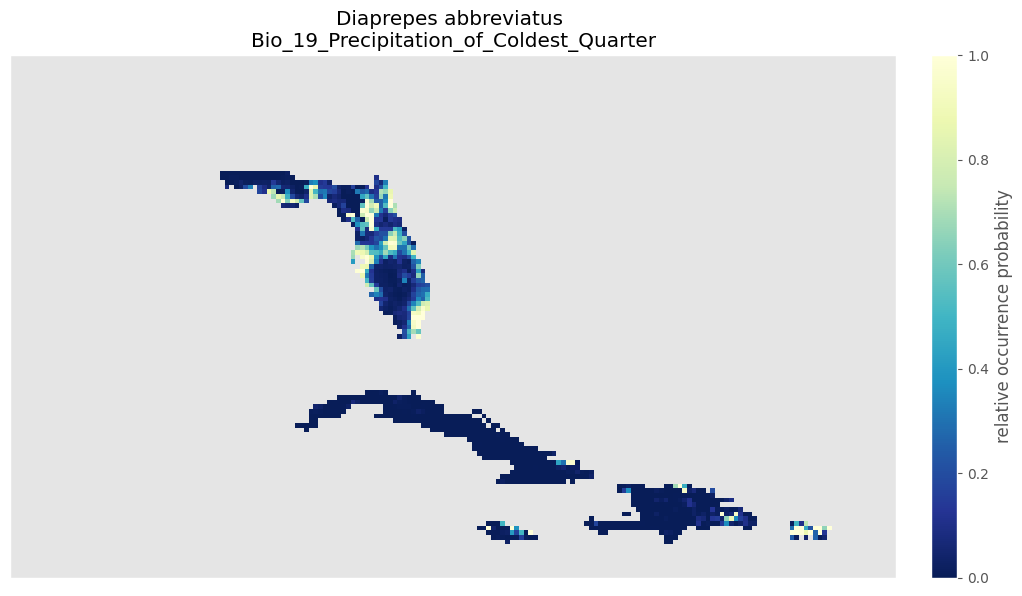

In [156]:

# plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes abbreviatus \nBio_19_Precipitation_of_Coldest_Quarter')
ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [157]:
#List of output raster filenames
output_rasters = [
    'Annual_mean_Temperature_WC_Prediction1.tif',
    'Mean_Diurnal_Range_WC_Prediction2.tif',
    'Isothermality_WC_Prediction3.tif',
    'Temperature_Seasonality_WC4.tif',
    'Maximum_Temperature_of_Warmest_Month_WC_Prediction5.tif',
    'Minimum_Temperature_of_Coldest_Month_WC_Prediction6.tif',
    'Temperature_Annual_Range_WC_Prediction7.tif',
    'Mean_Temperature_of_Wettest_Quarter_WC_Prediction8.tif',
    'Mean_Temperature_of_Driest_Quarter_WC_Prediction9.tif',
    'Mean_Temperature_of_Warmest_Quarter_WC_Prediction10.tif',
    'Mean_Temperature_of_Coldest_Quarter_WC_Prediction11.tif',
    'Annual_Precipitation_WC_Prediction12.tif',
    'Precipitation_of_Wettest_Month_WC_Prediction13.tif',
    'Precipitation_of_Driest_Month_WC_Prediction14.tif',
    'Precipitation_of_Seasonality_WC_Prediction15.tif',
    'Precipitation_of_Wettest_Quarter_WC_Prediction16.tif',
    'Precipitation_of_Driest_Quarter_WC_Prediction17.tif',
    'Precipitation_of_Warmest_Quarter_WC_Prediction18.tif',
    'Precipitation_of_Coldest_Quarter_WC_Prediction19.tif'
] + [f'{i+1}_WC_Prediction.tif' for i in range(19)]



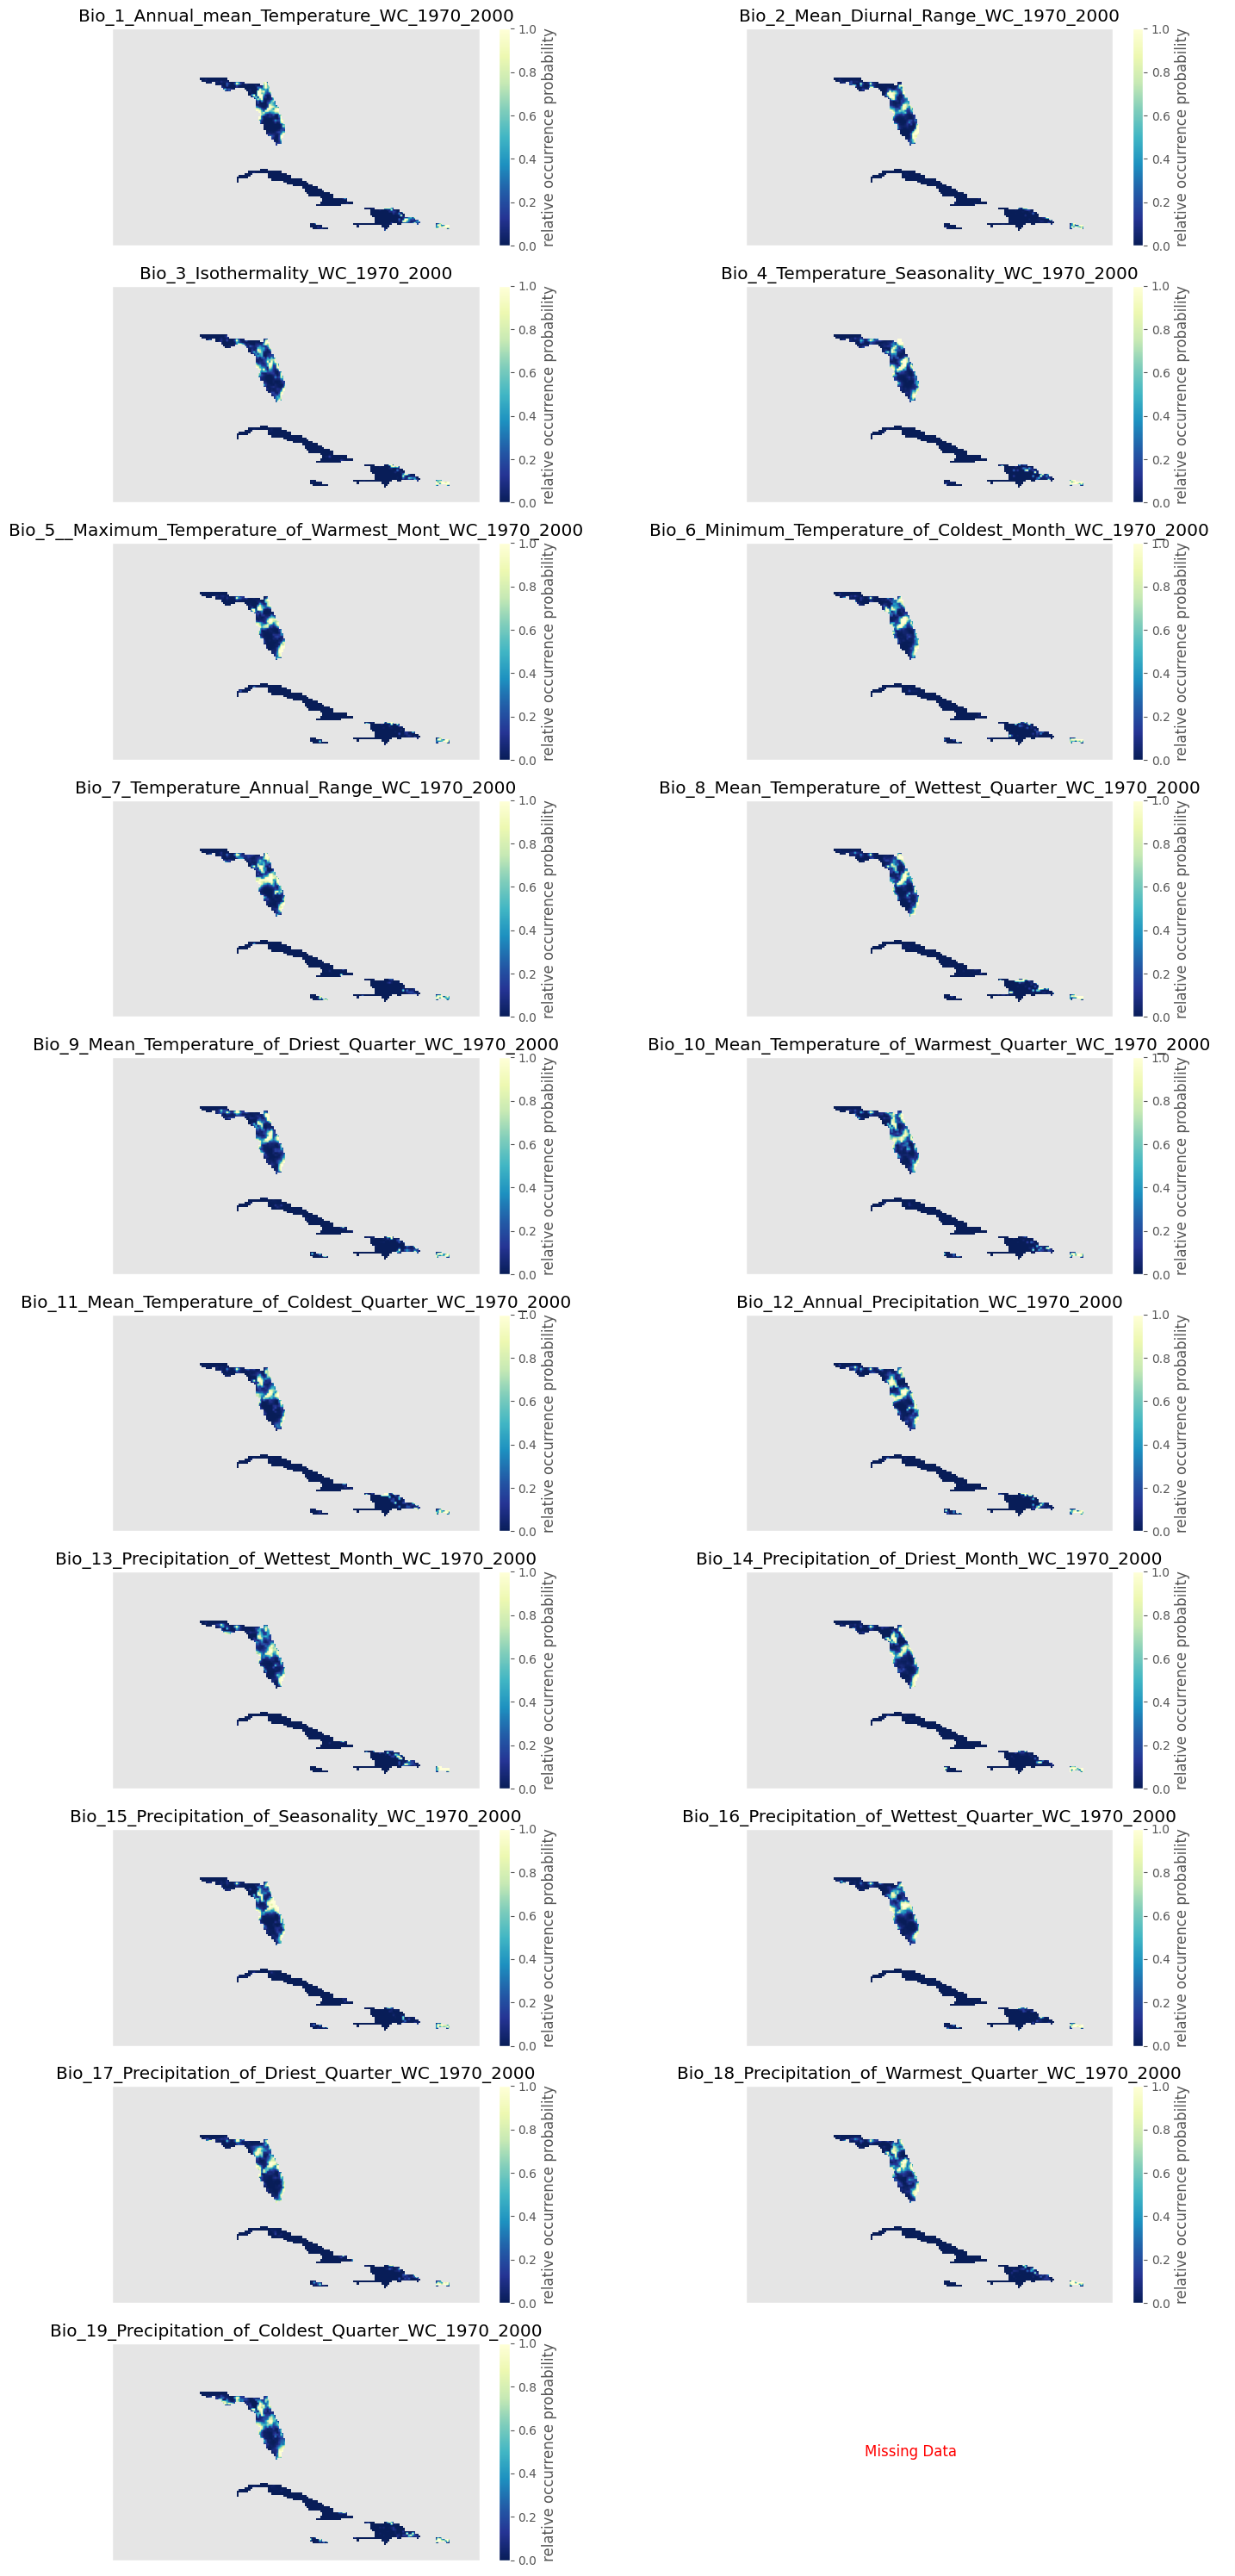

In [158]:
# Create a grid layout for subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30), dpi=100)

# Iterate over each subplot and plot the suitability predictions
for i, ax in enumerate(axes.flat):
    # Check if the output raster file exists
    if i < len(output_rasters) and os.path.exists(output_rasters[i]):
        # Read the suitability predictions for the corresponding bioclimate variable
        with rio.open(output_rasters[i], 'r') as src:
            pred = src.read(1, masked=True)

        # Plot the suitability predictions
        plot = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')

        # Set the custom title for the subplot
        ax.set_title(labels[i])

        ax.set_xticks([])
        ax.set_yticks([])
        cbar = plt.colorbar(plot, ax=ax, label="relative occurrence probability", pad=0.03)
    else:
        # If the output raster is missing, display a placeholder message
        ax.axis('off')
        ax.text(0.5, 0.5, 'Missing Data', horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=12, color='red')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [159]:
# List of known labels or variables
known_labels = [
    'Annual_mean_Temperature_WC_Prediction1.tif',
    'Mean_Diurnal_Range_WC_Prediction2.tif',
    'Isothermality_WC_Prediction3.tif',
    'Temperature_Seasonality_WC4.tif',
    'Maximum_Temperature_of_Warmest_Month_WC_Prediction5.tif',
    'Minimum_Temperature_of_Coldest_Month_WC_Prediction6.tif',
    'Temperature_Annual_Range_WC_Prediction7.tif',
    'Mean_Temperature_of_Wettest_Quarter_WC_Prediction8.tif',
    'Mean_Temperature_of_Driest_Quarter_WC_Prediction9.tif',
    'Mean_Temperature_of_Warmest_Quarter_WC_Prediction10.tif',
    'Mean_Temperature_of_Coldest_Quarter_WC_Prediction11.tif',
    'Annual_Precipitation_WC_Prediction12.tif',
    'Precipitation_of_Wettest_Month_WC_Prediction13.tif',
    'Precipitation_of_Driest_Month_WC_Prediction14.tif',
    'Precipitation_of_Seasonality_WC_Prediction15.tif',
    'Precipitation_of_Wettest_Quarter_WC_Prediction16.tif',
    'Precipitation_of_Driest_Quarter_WC_Prediction17.tif',
    'Precipitation_of_Warmest_Quarter_WC_Prediction18.tif',
    'Precipitation_of_Coldest_Quarter_WC_Prediction19.tif'
]

# Initialize a dictionary to store the matching scores
matching_scores = {}

# Iterate over the known labels
for known_label in known_labels:
    # Initialize the matching score for the current known label
    matching_score = 0

    # Compare the current known label against the output raster filenames
    for output_raster in output_rasters:
        if known_label in output_raster:
            matching_score = 1
            break

    # Store the matching score in the dictionary
    matching_scores[known_label] = matching_score

# Print the matching scores
for known_label, score in matching_scores.items():
    print(f'{known_label}: {score}')


Annual_mean_Temperature_WC_Prediction1.tif: 1
Mean_Diurnal_Range_WC_Prediction2.tif: 1
Isothermality_WC_Prediction3.tif: 1
Temperature_Seasonality_WC4.tif: 1
Maximum_Temperature_of_Warmest_Month_WC_Prediction5.tif: 1
Minimum_Temperature_of_Coldest_Month_WC_Prediction6.tif: 1
Temperature_Annual_Range_WC_Prediction7.tif: 1
Mean_Temperature_of_Wettest_Quarter_WC_Prediction8.tif: 1
Mean_Temperature_of_Driest_Quarter_WC_Prediction9.tif: 1
Mean_Temperature_of_Warmest_Quarter_WC_Prediction10.tif: 1
Mean_Temperature_of_Coldest_Quarter_WC_Prediction11.tif: 1
Annual_Precipitation_WC_Prediction12.tif: 1
Precipitation_of_Wettest_Month_WC_Prediction13.tif: 1
Precipitation_of_Driest_Month_WC_Prediction14.tif: 1
Precipitation_of_Seasonality_WC_Prediction15.tif: 1
Precipitation_of_Wettest_Quarter_WC_Prediction16.tif: 1
Precipitation_of_Driest_Quarter_WC_Prediction17.tif: 1
Precipitation_of_Warmest_Quarter_WC_Prediction18.tif: 1
Precipitation_of_Coldest_Quarter_WC_Prediction19.tif: 1


In [160]:
auc_values = []  # Initialize an empty list to store the values

for i in range(1, 20):
    auc_values.append(f'auc{i}')  # Add each value to the list
print(auc_values)

['auc1', 'auc2', 'auc3', 'auc4', 'auc5', 'auc6', 'auc7', 'auc8', 'auc9', 'auc10', 'auc11', 'auc12', 'auc13', 'auc14', 'auc15', 'auc16', 'auc17', 'auc18', 'auc19']


In [161]:
# Printing the values of the variables with formatting
for var_name in auc_values:
    value = locals().get(var_name)
    if value is not None:
        print(f"{var_name}: {value:.3f}")

auc1: 0.964
auc2: 0.961
auc3: 0.967
auc4: 0.957
auc5: 0.969
auc6: 0.965
auc7: 0.964
auc8: 0.965
auc9: 0.961
auc10: 0.969
auc11: 0.964
auc12: 0.959
auc13: 0.961
auc14: 0.976
auc15: 0.967
auc16: 0.966
auc17: 0.963
auc18: 0.957
auc19: 0.952
